<a href="https://colab.research.google.com/github/SoumajitPal/Time-Series-Analysis/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Time Series Analysis**

**Overview**

The goal of this project is to predict future monthly sales based on historical sales data. By using the ARIMA model, which accounts for the time-dependence of sales patterns, we aim to help businesses forecast future demand, optimize inventory, and plan marketing strategies.

**1. Importing Required Libraries**

Here, we import essential libraries:

1. Pandas (pd): Used for data manipulation and analysis, providing powerful tools to work with structured data in the form of dataframes.

2. NumPy (np): Provides support for numerical operations, efficient array handling, and mathematical functions.

3. sklearn.preprocessing: Offers various techniques for data preprocessing, including scaling, encoding, and normalization.

4. Matplotlib.pyplot (plt): A plotting library for creating static, animated, and interactive visualizations in Python.

5. seaborn (sns): A statistical data visualization library built on top of Matplotlib, designed for creating informative and attractive plots with ease.

6. sklearn.linear_model.LogisticRegression: Implements logistic regression for binary classification tasks.

7. sklearn.model_selection.train_test_split: A utility for splitting data into training and testing sets for model evaluation.

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
sns.set(style="whitegrid", color_codes=True)

**2. Loading the Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving monthly-sales.xlsx to monthly-sales.xlsx


files.upload() is used to upload a file from the local machine to the Google Colab environment. A file picker dialog appears, allowing you to select the dataset (in this case, monthly-sales.xlsx).
The uploaded file is temporarily stored in the Colab session and is accessible by its filename.

**3. Data Preprocessing**

In [5]:
df = pd.read_excel('monthly-sales.xlsx')
df.head()

,Month,Monthly Sales
0,2008-01,154000
1,2008-02,96000
2,2008-03,73000
3,2008-04,51000
4,2008-05,53000


The pd.read_excel function reads the uploaded xlsx file and converts it into a Pandas DataFrame. While the head() function displays the first 5 rows of the dataset to understand its structure and content.

In [7]:
df.tail()

,Month,Monthly Sales
64,2013-05,231000
65,2013-06,271000
66,2013-07,329000
67,2013-08,401000
68,2013-09,553000


The tail() function displays the last 5 rows of the dataset to understand its structure and content.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          69 non-null     object
 1   Monthly Sales  69 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


Provides a concise summary of a DataFrame, including the number of entries, column names, non-null counts, data types, and memory usage

In [9]:
df = df.set_index('Month')
df.index =  pd.date_range(start=df.index[0] , periods=len(df), freq='MS')

The code snippet first sets the 'Month' column of the DataFrame df as the index using df.set_index('Month'). This operation allows for more efficient time series analysis. Then, the index is replaced with a new datetime index generated using pd.date_range(). The new index starts from the first value of the original 'Month' column (df.index[0]) and spans a total number of periods equal to the length of the DataFrame (len(df)). The frequency of the dates is set to 'MS' (Month Start), ensuring that each date in the new index corresponds to the first day of each month. This transformation is useful for time series forecasting, as it ensures the data is aligned to monthly intervals starting from the beginning of each month.

**4. Splitting the Dataset**

In [16]:
df_train = df.iloc[:-9, :]
df_test = df.iloc[-9:, :]

df_train.index = pd.date_range(start=df_train.index[0] , periods=len(df_train), freq='MS')
df_test.index = pd.date_range(start=df_test.index[0] , periods=len(df_test), freq='MS')

The code splits the original DataFrame df into two subsets: a training set (df_train) containing all but the last 9 rows, and a testing set (df_test) containing the last 9 rows. After splitting the data, it reassigns a datetime index to both subsets. The training set's index is generated using pd.date_range(), starting from the first date of the training data and spanning a number of periods equal to the length of the training set, with a frequency of 'MS' (Month Start). Similarly, the testing set is given a datetime index starting from the first date of the testing data, with the same frequency and number of periods corresponding to its length. This ensures both subsets are aligned with monthly intervals, which is crucial for time series forecasting.

In [17]:
df_train.shape, df_test.shape

((60, 1), (9, 1))

Returns the dimensions of the df_train and df_test DataFrames, providing a tuple with the number of rows and columns for each subset

In [18]:
df_test['Monthly Sales']

,Monthly Sales
2013-01-01,613000
2013-02-01,392000
2013-03-01,330000
2013-04-01,322000
2013-05-01,231000
2013-06-01,271000
2013-07-01,329000
2013-08-01,401000
2013-09-01,553000


Refers to the 'Monthly Sales' column of the df_test DataFrame, which contains the sales values for the test set.

**5. Exploratory Data Analysis**

**Time Series Plots of Sales Amount**

Text(0.5, 1.0, 'Time Series Plots of Sales Amount')

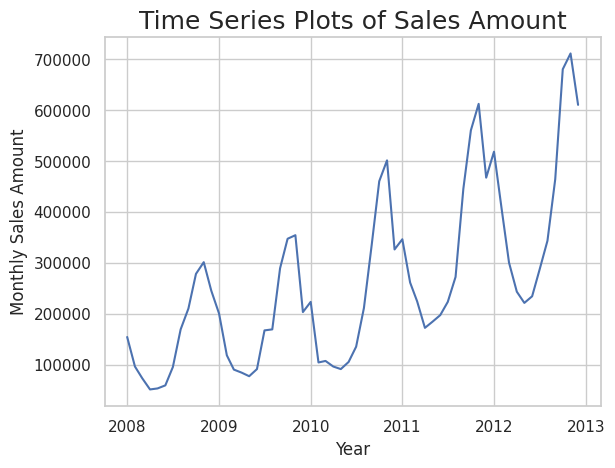

In [19]:
fig, ax = plt.subplots()
ax.plot(df_train.index, df_train['Monthly Sales'])
ax.set_ylabel('Monthly Sales Amount')
ax.set_xlabel('Year')
ax.set_title('Time Series Plots of Sales Amount', size=18)

**Observations:**

1. Trend: There appears to be a general upward trend in sales over the years. This suggests that the overall business is growing.

2. Seasonality: There are distinct peaks and troughs in the data, which indicates a seasonal pattern. Sales seem to be higher in the latter part of the year (likely around the holiday season) and lower in the earlier part.

3. Outliers: There are a few data points that deviate significantly from the overall trend. These could be due to various reasons like promotional activities, economic events, or other external factors.

**Inferences:**

1. Business Growth: The upward trend suggests that the company has been successful in expanding its market or increasing its product offerings.

2. Seasonal Impact: The seasonal pattern highlights the importance of planning and managing inventory levels accordingly. It's crucial to stock up during peak periods and adjust production during slower times.

Text(0.5, 0, 'Year')

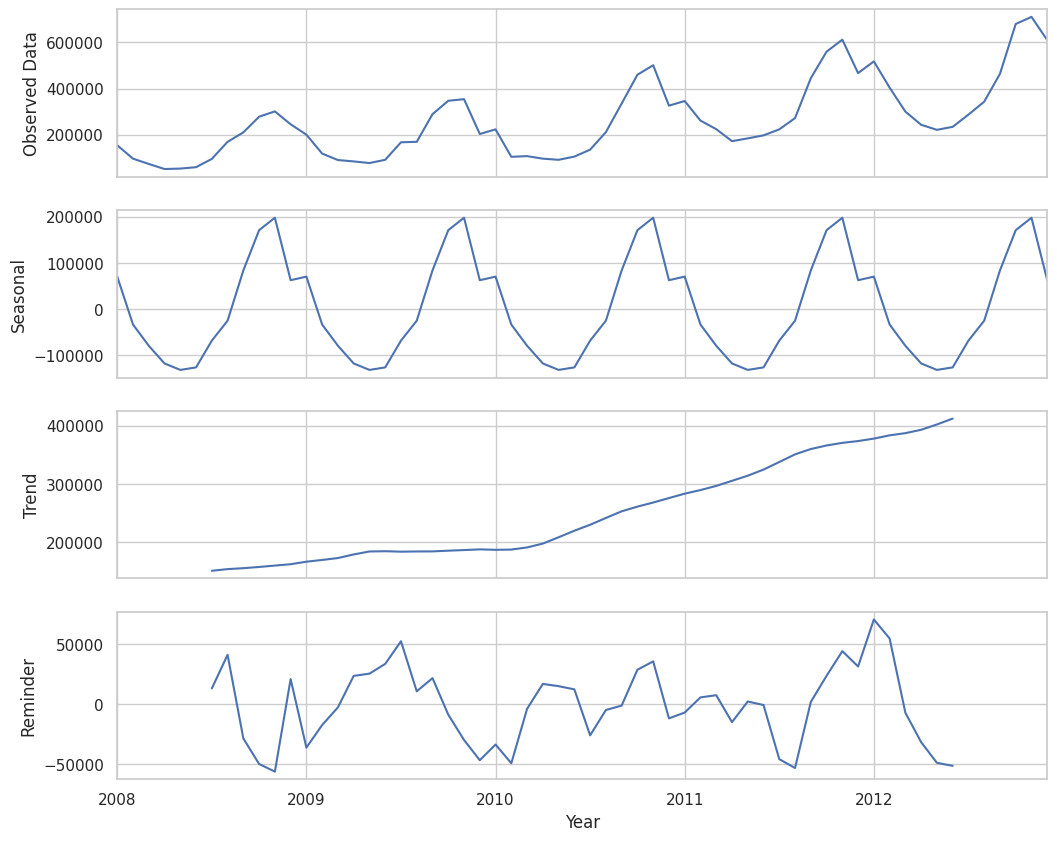

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(df_train['Monthly Sales'], model='additive', period=12)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,10), sharex= True)
res.observed.plot(ax=ax1)
ax1.set_ylabel('Observed Data')
res.seasonal.plot(ax=ax2)
ax2.set_ylabel('Seasonal')
res.trend.plot(ax=ax3)
ax3.set_ylabel('Trend')
res.resid.plot(ax=ax4)
ax4.set_ylabel('Reminder')

plt.xlabel("Year")

**Observations:**

1. Trend: The trend component shows a clear upward trajectory over the years. This indicates that the overall sales have been increasing steadily over time.

2. Seasonality: The seasonal component reveals a strong seasonal pattern. There are distinct peaks and troughs throughout the year, suggesting that sales are influenced by factors like holidays, promotions, or weather patterns.

3. Remainder: The remainder component, also known as the residual or error term, represents the part of the data that is not explained by the trend and seasonal components. It shows some fluctuations, but overall, it appears to be relatively small compared to the trend and seasonal components.

**Inferences:**

1. Growth: The upward trend suggests that the business has been successful in expanding its market or increasing its product offerings.

2. Seasonal Impact: The seasonal pattern highlights the importance of planning and managing inventory levels accordingly. It's crucial to stock up during peak periods and adjust production during slower times.

3. Model Fit: The relatively small remainder component indicates that the model, which decomposes the data into trend and seasonal components, provides a good fit to the data. This suggests that the model can be used for forecasting future sales trends with reasonable accuracy.

**6. ARIMA Model**

The ARIMA (AutoRegressive Integrated Moving Average) model is a popular time series forecasting method that combines three components: autoregression (AR), differencing (I), and moving average (MA). It is used to predict future values based on historical data by modeling dependencies in the time series. The autoregressive component uses past values to predict future ones, the integrated component makes the series stationary by differencing, and the moving average component captures the relationship between an observation and a residual error from a moving average model. ARIMA is effective for datasets with trends and seasonality and is widely used for financial, economic, and sales forecasting.

In [22]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_train.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 2.761695
p-value: 1.000000


The code performs an Augmented Dickey-Fuller (ADF) test on the df_train DataFrame to assess the stationarity of the time series data. The ADF statistic of 2.76 and a p-value of 1.0 suggest that the series is non-stationary, as the p-value is much higher than the typical significance level of 0.05. This indicates that the null hypothesis (that the series has a unit root and is non-stationary) cannot be rejected. Therefore, the series requires further preprocessing, such as differencing, to make it stationary before applying the ARIMA model for forecasting.

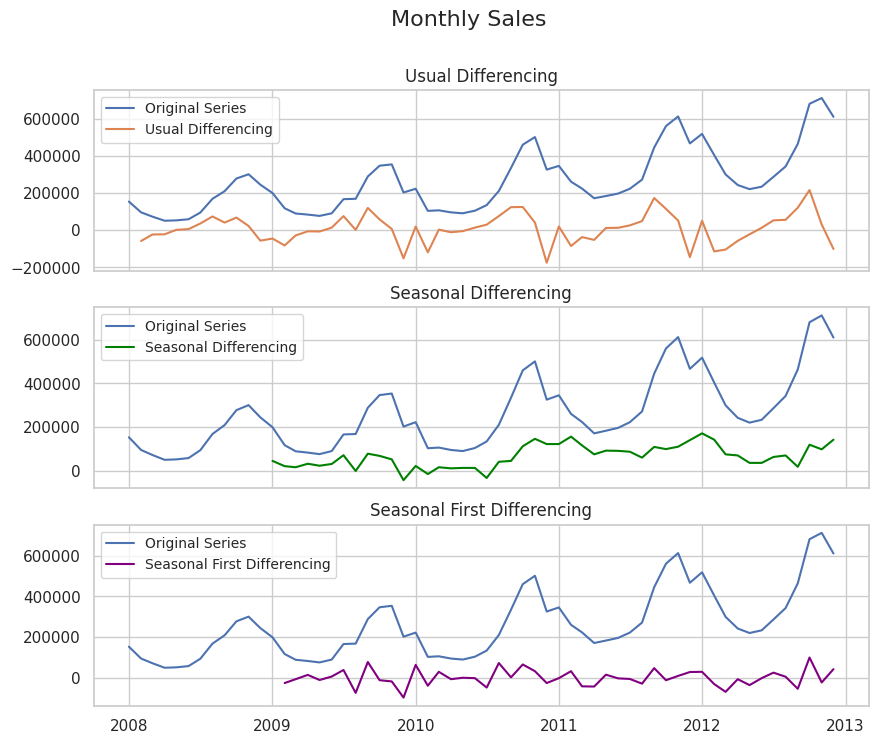

In [24]:
fig, axes = plt.subplots(3, 1, figsize=(10,8), dpi=100, sharex=True)

axes[0].plot(df_train, label='Original Series')
axes[0].plot(df_train.diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)
df_diff = df_train.diff(1)

axes[1].plot(df_train, label='Original Series')
axes[1].plot(df_train.diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
axes[1].legend(loc='upper left', fontsize=10)

axes[2].plot(df_train, label='Original Series')
axes[2].plot(df_diff.diff(12), label='Seasonal First Differencing', color='purple')
axes[2].set_title('Seasonal First Differencing')
axes[2].legend(loc='upper left', fontsize=10)
plt.suptitle('Monthly Sales', fontsize=16)
plt.show()

**Observations:**

1. Trend: The original series exhibits a clear upward trend over time.

2. Seasonality: There is a seasonal pattern in the data, with peaks and troughs recurring annually.

3. Differencing: Differencing techniques (usual, seasonal, and seasonal first) are applied to remove the trend and seasonal components.

4. Stationarity: After applying seasonal first differencing, the series appears to be more stationary, with less pronounced fluctuations and a mean closer to zero.

**Inferences:**

1. Growth: The upward trend suggests that the business has been experiencing growth over the years.

2. Seasonal Impact: The seasonal pattern indicates that certain factors, such as holidays or weather conditions, influence sales.

3. Differencing Effectiveness: Seasonal first differencing seems to be the most effective technique in removing both trend and seasonal components, making the series more suitable for further analysis and forecasting.

4. Stationarity: Stationarity is a desirable property in time series analysis as it allows for the application of various statistical techniques. By achieving stationarity, we can make more reliable predictions and insights.

In [25]:
seasonal_first_differencing = df_diff.diff(12)
result_seasonal_first_diff = adfuller(seasonal_first_differencing.dropna())
print('ADF Statistic for Seasonal First Differencing: %.4f' % result_seasonal_first_diff[0])
print('p-value for Seasonal First Differencing: %.4f' % result_seasonal_first_diff[1])

ADF Statistic for Seasonal First Differencing: -9.6008
p-value for Seasonal First Differencing: 0.0000


The code applies seasonal first differencing to the time series data in df_diff by subtracting values from 12 periods earlier, effectively removing yearly seasonal patterns. The resulting series is then tested for stationarity using the Augmented Dickey-Fuller (ADF) test. The test yields an ADF statistic of -9.6008 and a p-value of 0.0000, which is well below the significance level of 0.05. This indicates that the null hypothesis of non-stationarity is rejected, confirming that the seasonally differenced series is now stationary and suitable for ARIMA modeling.

**ACF and PACF plots for Initial Time Series**

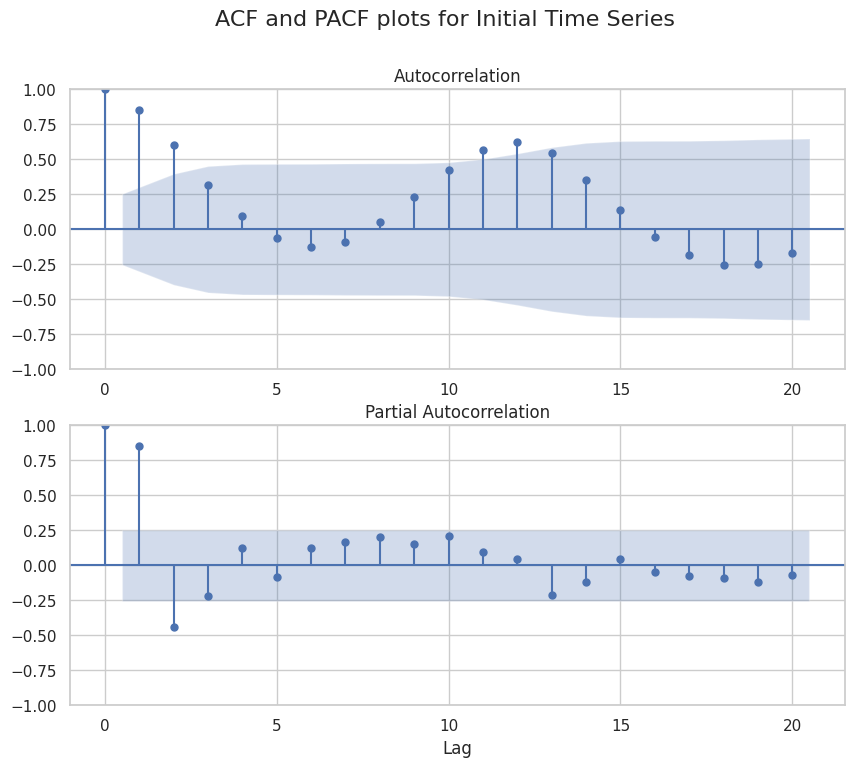

In [46]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig=plot_acf(df_train,  lags=20, ax=ax1)

ax2 = fig.add_subplot(212)
fig=plot_pacf(df_train, lags=20,  ax=ax2)

plt.xlabel('Lag')
plt.suptitle('ACF and PACF plots for Initial Time Series', fontsize=16)
plt.show()

**ACF Plot:**

1. The ACF plot shows significant spikes at lags 1 and 12, suggesting strong correlations between the current value and the previous value and the value from the previous year.

2. The spikes gradually decay as the lag increases.


**PACF Plot:**

1. The PACF plot shows significant spikes at lag 1, indicating that the current value is significantly influenced by the previous value.

2. The subsequent spikes are not significant, suggesting that the influence of past values beyond the first lag is minimal.

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error

def mean_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred) / y_true * 100)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def running_diff(arr, N):
    return np.array([arr[i] - arr[i-N] for i in range(N, len(arr))])

def mean_absolute_scaled_error(training_series, testing_series, prediction_series):
    errors_mean = np.abs(testing_series - prediction_series ).mean()
    d = np.abs(running_diff(training_series, 12) ).mean()
    return errors_mean/d

Defines several evaluation metrics and functions for assessing forecasting models. The mean percentage error (MPE) measures the average percentage difference between actual and predicted values, while the mean absolute percentage error (MAPE) calculates the average of absolute percentage differences, providing an intuitive measure of prediction accuracy. The running_diff function computes the differences between an element in a series and its counterpart a fixed number of steps earlier, useful for analyzing seasonal patterns. Finally, the mean absolute scaled error (MASE) evaluates forecast accuracy by normalizing the mean absolute error using the seasonal differences in the training data, offering a scale-independent metric that accounts for seasonality.

**ACF and PACF plots for Seasonal Differencing Time Series**

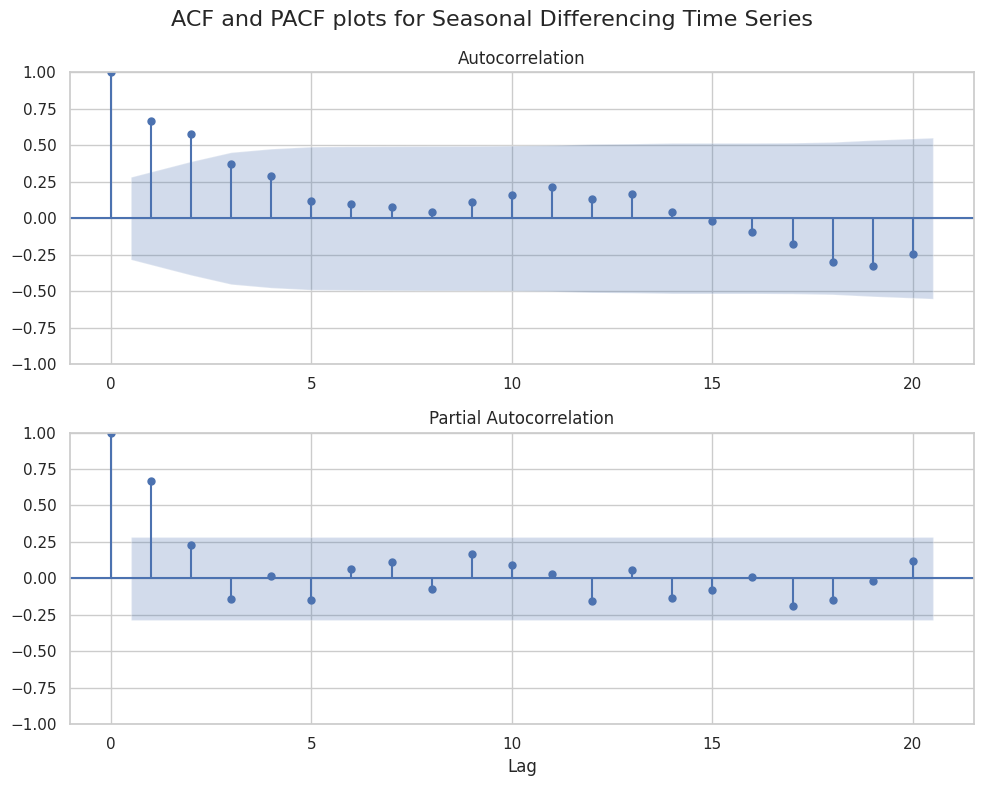

In [49]:
seasonal_diff = running_diff(df_train['Monthly Sales'].to_numpy(), 12)

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(211)
plot_acf(seasonal_diff, lags=20, ax=ax1)

ax2 = fig.add_subplot(212)
plot_pacf(seasonal_diff, lags=20, ax=ax2)

plt.xlabel('Lag')
plt.suptitle('ACF and PACF plots for Seasonal Differencing Time Series', fontsize=16)
plt.tight_layout()
plt.show()

**ACF Plot:**

1. The ACF plot shows significant spikes at lags 1 and 12, suggesting strong correlations between the seasonally differenced series and its lagged versions.

2. The spikes gradually decay as the lag increases.

3. There are also some significant spikes at other lags, indicating that some short-term autocorrelation might still be present.


**PACF Plot:**

1. The PACF plot shows a significant spike at lag 1, suggesting that the current value of the seasonally differenced series is influenced by its previous value.

2. The subsequent spikes are not significant, indicating that the influence of past values beyond the first lag is minimal.

**ACF and PACF plots for Seasonal First Differenced Time Series**

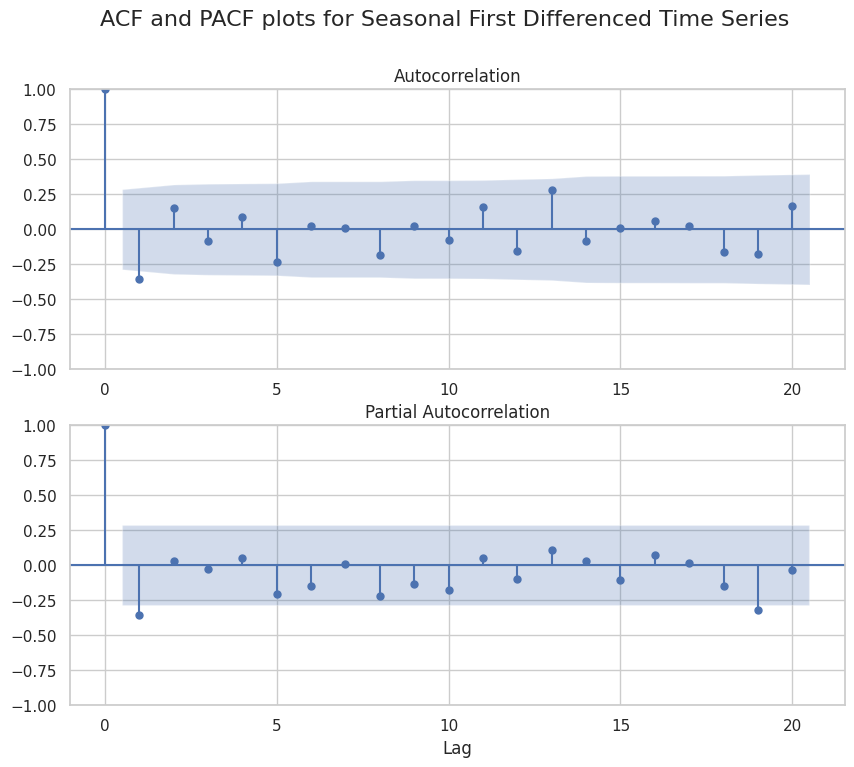

In [50]:
seasonal_diff_1 = running_diff(seasonal_diff, 1)

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig=plot_acf(seasonal_diff_1, lags=20,  ax=ax1)

ax2 = fig.add_subplot(212)
fig=plot_pacf(seasonal_diff_1, lags=20,  ax=ax2)

plt.xlabel('Lag')
plt.suptitle('ACF and PACF plots for Seasonal First Differenced Time Series', fontsize=16)
plt.show()

**ACF Plot:**

The ACF plot shows no significant spikes outside the confidence intervals, indicating that the seasonally first differenced series has minimal autocorrelation.

**PACF Plot:**

The PACF plot shows no significant spikes outside the confidence intervals, indicating that there is no significant influence of past values on the current value of the seasonally first differenced series.

In [56]:
model_sarima = sm.tsa.statespace.SARIMAX(endog = df_train,order=(0, 1, 1), seasonal_order=(0,1,0,12),trend = 't', freq = 'MS',seasonal_periods =12,
                                         enforce_stationarity=False, enforce_invertibility=False)

sarima_fitted = model_sarima.fit(dynamic=False)
print(sarima_fitted.summary())

                                      SARIMAX Results                                      
Dep. Variable:                       Monthly Sales   No. Observations:                   60
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -539.257
Date:                             Tue, 19 Nov 2024   AIC                           1084.514
Time:                                     07:07:55   BIC                           1089.934
Sample:                                 01-01-2008   HQIC                          1086.534
                                      - 12-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift        140.1670    115.532      1.213      0.225     -86.271     366.605
ma.L1         -0.3127      

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_periods']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dynamic. After release 0.14, this will raise.
  warnings.warn(


The output summarizes the SARIMAX model fitted to the training dataset. The model configuration includes an order of (0, 1, 1) for non-seasonal parameters and (0, 1, [], 12) for seasonal parameters, with a drift trend term. Key results include 60 observations, a Log-Likelihood of -539.257, and model selection criteria like AIC (1084.514) and BIC (1089.934), which help assess model fit. The coefficients table shows estimates for the drift, moving average term (ma.L1), and variance (sigma2), along with their standard errors, z-scores, and p-values. Diagnostics like the Ljung-Box and Jarque-Bera tests suggest no significant autocorrelation or deviation from normality, indicating the model fits reasonably well.

**7. Predictions and Forecasting**

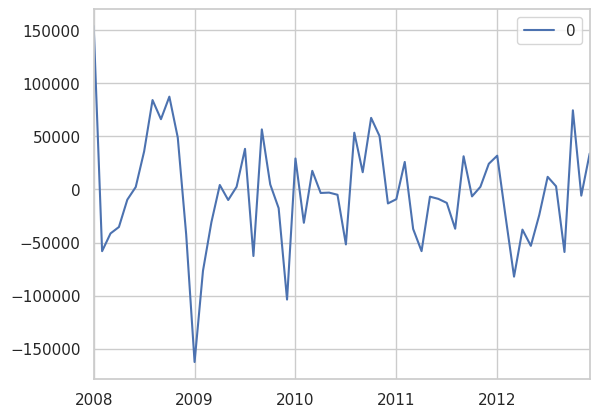

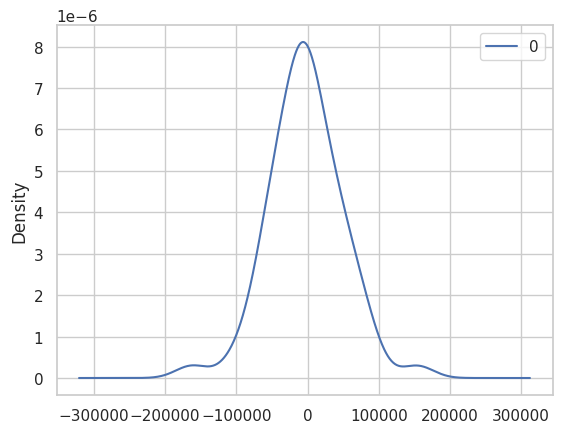

                   0
count      60.000000
mean    -2728.507861
std     51258.729628
min   -162552.998315
25%    -35772.791471
50%     -5397.052367
75%     29716.807684
max    154000.000000


In [57]:
residuals = pd.DataFrame(sarima_fitted.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

**Observations:**

1. Residuals are randomly scattered around zero, indicating no systematic error in the model's predictions.

2. KDE plot is symmetric and bell-shaped, suggesting normality and validating one of the assumptions of the SARIMA model.

3. Descriptive statistics show a mean close to zero and low standard deviation, further confirming the model's accuracy.

**Inferences:**

1. The SARIMA model fits the data well, capturing the underlying patterns and trends.

2. The residuals are normally distributed, validating one of the model assumptions and suggesting that the model is appropriate for the data.

3. The model can be used to make reliable forecasts for future values of the time series.

**Actual vs Fitted Values**

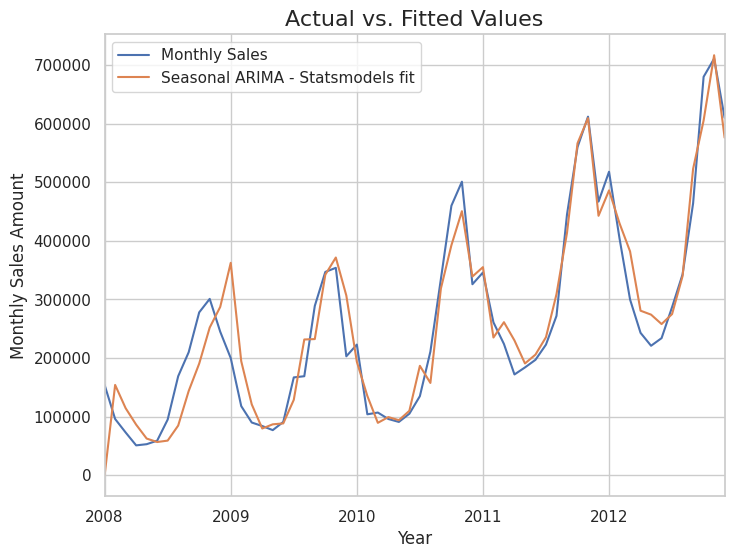

In [58]:
df_train.plot(label='Original data',figsize=(8,6))
sarima_fitted.fittedvalues.plot(label='Seasonal ARIMA - Statsmodels fit')
plt.ylabel("Monthly Sales Amount");
plt.xlabel("Year")
plt.title('Actual vs. Fitted Values', fontsize= 16)
plt.legend();

**Observations:**

1. The fitted values from the SARIMA model closely track the actual values, indicating a good fit.

2. The model captures the overall trend and seasonal patterns present in the data.

3. There are some discrepancies between the actual and fitted values, especially during periods of high volatility or sudden changes in the data.

In [59]:
predicted_sarima = sarima_fitted.predict().values
expected_sarima = df_train.values

mse_sarima  = mean_squared_error(expected_sarima, predicted_sarima)
rmse_sarima = sqrt(mse_sarima)
mae_sarima  = mean_absolute_error(expected_sarima, predicted_sarima)
mpe_sarima  = mean_percentage_error(expected_sarima, predicted_sarima)
mape_sarima = mean_absolute_percentage_error(expected_sarima, predicted_sarima)
mase_sarima = mean_absolute_scaled_error(expected_sarima, expected_sarima, predicted_sarima)

print('In-Sample Error Measures of Seasonal ARIMA Models:')
print(' ')
print('- RMSE : %f' % rmse_sarima)
print('- MAE  : %f' % mae_sarima)
print('- MPE  : %f' % mpe_sarima)
print('- MAPE : %f' % mape_sarima)
print('- MASE : %f' % mase_sarima)

In-Sample Error Measures of Seasonal ARIMA Models:
 
- RMSE : 50902.958285
- MAE  : 38018.933301
- MPE  : -57.495502
- MAPE : 104.266299
- MASE : 2.551123


Calculates in-sample error metrics to evaluate the performance of the fitted Seasonal ARIMA (SARIMA) model. The predicted_sarima values are derived from the SARIMA model's predictions, while the expected_sarima values are the actual observed values from the training dataset. Several error measures are computed:

Root Mean Square Error (RMSE): Measures the average magnitude of prediction errors, penalizing large errors more heavily.
Mean Absolute Error (MAE): Captures the average magnitude of absolute errors.

Mean Percentage Error (MPE): Reflects the average directional error as a percentage, which can be negative if predictions are consistently lower.

Mean Absolute Percentage Error (MAPE): Indicates the average absolute error as a percentage, providing a scale-free metric.

Mean Absolute Scaled Error (MASE): Compares the mean absolute error to the average seasonal error in the training series, making it robust against series scale.

For this model, the in-sample errors include an RMSE of 50,902.96, an MAE of 38,018.93, an MPE of -57.50, a MAPE of 104.27, and a MASE of 2.55, highlighting the model's error magnitudes and tendencies.

In [61]:
model_sarima_holdout = sm.tsa.statespace.SARIMAX(endog = df,order=(0, 1, 1), seasonal_order=(0,1,0,12),trend = 't', freq = 'MS',seasonal_periods =12,
                                                 enforce_stationarity=False,enforce_invertibility=False)
sarima_fitted_holdout = model_sarima_holdout.fit(dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_periods']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dynamic. After release 0.14, this will raise.
  warnings.warn(


Fits a SARIMA model to the entire dataset (df), including both training and testing periods, to enable forecasting for the holdout period. The model uses an ARIMA order of (0, 1, 1) and seasonal parameters (0, 1, 0, 12) to capture non-seasonal and yearly seasonal patterns, respectively, while incorporating a linear trend (trend='t'). Monthly data frequency is specified with freq='MS', and constraints on stationarity and invertibility are relaxed for flexibility. The fit() method estimates model parameters using observed values (dynamic=False), preparing the model for generating predictions and evaluating its performance on the holdout data.








In [62]:
sarima_fitted_holdout.predict()[-9:]

,predicted_mean
2013-01-01,644498.670752
2013-02-01,512001.433623
2013-03-01,334535.816122
2013-04-01,275825.523324
2013-05-01,283638.659214
2013-06-01,265077.673473
2013-07-01,322917.680752
2013-08-01,383874.673687
2013-09-01,516710.170399


Extracts the last 9 predicted values from the SARIMA model fitted to the entire dataset, corresponding to the holdout (test) period.

In [63]:
holdout_results = pd.DataFrame({'actual': df_test['Monthly Sales'],
                                 'predicted_ARIMA': sarima_fitted_holdout.predict()[-9:].values },
                               index = df_test.index)
holdout_results

,actual,predicted_ARIMA
2013-01-01,613000,644498.670752
2013-02-01,392000,512001.433623
2013-03-01,330000,334535.816122
2013-04-01,322000,275825.523324
2013-05-01,231000,283638.659214
2013-06-01,271000,265077.673473
2013-07-01,329000,322917.680752
2013-08-01,401000,383874.673687
2013-09-01,553000,516710.170399


Creates a DataFrame, holdout_results, to compare the actual sales values from the holdout period with the predicted values generated by the SARIMA model for the same period. It aligns the predictions and actuals using the test dataset's index, providing a clear structure for evaluating the model's performance during the holdout period.

In [66]:
mse_sarima_hos  = mean_squared_error(df_test['Monthly Sales'], holdout_results['predicted_ARIMA'])
rmse_sarima_hos = sqrt(mse_sarima_hos)
mae_sarima_hos  = mean_absolute_error(df_test['Monthly Sales'],  holdout_results['predicted_ARIMA'])
mpe_sarima_hos  = mean_percentage_error(df_test['Monthly Sales'],  holdout_results['predicted_ARIMA'])
mape_sarima_hos = mean_absolute_percentage_error(df_test['Monthly Sales'],  holdout_results['predicted_ARIMA'])
mase_sarima_hos = mean_absolute_scaled_error(df_train.values, df_test['Monthly Sales'],  holdout_results['predicted_ARIMA'])
print(' ')
print('Holdout-Sample Error Measures of Seasonal ARIMA Models:')
print(' ')
print('- RMSE : %.3f' % rmse_sarima_hos)
print('- MAE  : %.3f' % mae_sarima_hos)
print('- MPE  : %.3f' % mpe_sarima_hos)
print('- MAPE : %.3f' % mape_sarima_hos)
print('- MASE : %.3f' % mase_sarima_hos)

 
Holdout-Sample Error Measures of Seasonal ARIMA Models:
 
- RMSE : 49439.404
- MAE  : 35585.429
- MPE  : -3.412
- MAPE : 9.902
- MASE : 0.501


Calculates in-sample error metrics to evaluate the performance of the fitted Seasonal ARIMA (SARIMA) model. The predicted_sarima values are derived from the SARIMA model's predictions, while the expected_sarima values are the actual observed values from the training dataset. Several error measures are computed:

Root Mean Square Error (RMSE): Measures the average magnitude of prediction errors, penalizing large errors more heavily.
Mean Absolute Error (MAE): Captures the average magnitude of absolute errors.

Mean Percentage Error (MPE): Reflects the average directional error as a percentage, which can be negative if predictions are consistently lower.

Mean Absolute Percentage Error (MAPE): Indicates the average absolute error as a percentage, providing a scale-free metric.

Mean Absolute Scaled Error (MASE): Compares the mean absolute error to the average seasonal error in the training series, making it robust against series scale.

For this model, the in-sample errors include an RMSE of 49439.40, an MAE of 35585.42, an MPE of -3.41, a MAPE of 9.90, and a MASE of 0.50, highlighting the model's error magnitudes and tendencies.

In [68]:
model_sarima_final = sm.tsa.statespace.SARIMAX(df, order=(0, 1, 1),
                                             seasonal_order=(0,1,0,12), trend = 't',
                                             seasonal_periods =12,
                                             enforce_stationarity=False, enforce_invertibility=False)
sarima_fitted_final = model_sarima_final.fit(dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_periods']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dynamic. After release 0.14, this will raise.
  warnings.warn(


Fits a final SARIMA model to the entire dataset (df), using the non-seasonal order (0, 1, 1) and seasonal order (0, 1, 0, 12) to capture monthly sales patterns with yearly seasonality. The model also includes a linear trend term (trend='t') and assumes a seasonal cycle of 12 periods. By setting enforce_stationarity=False and enforce_invertibility=False, the model allows for greater flexibility in fitting, even if the data is not strictly stationary or invertible. The fit() method trains the model on the entire dataset, preparing it for forecasting and performance evaluation.

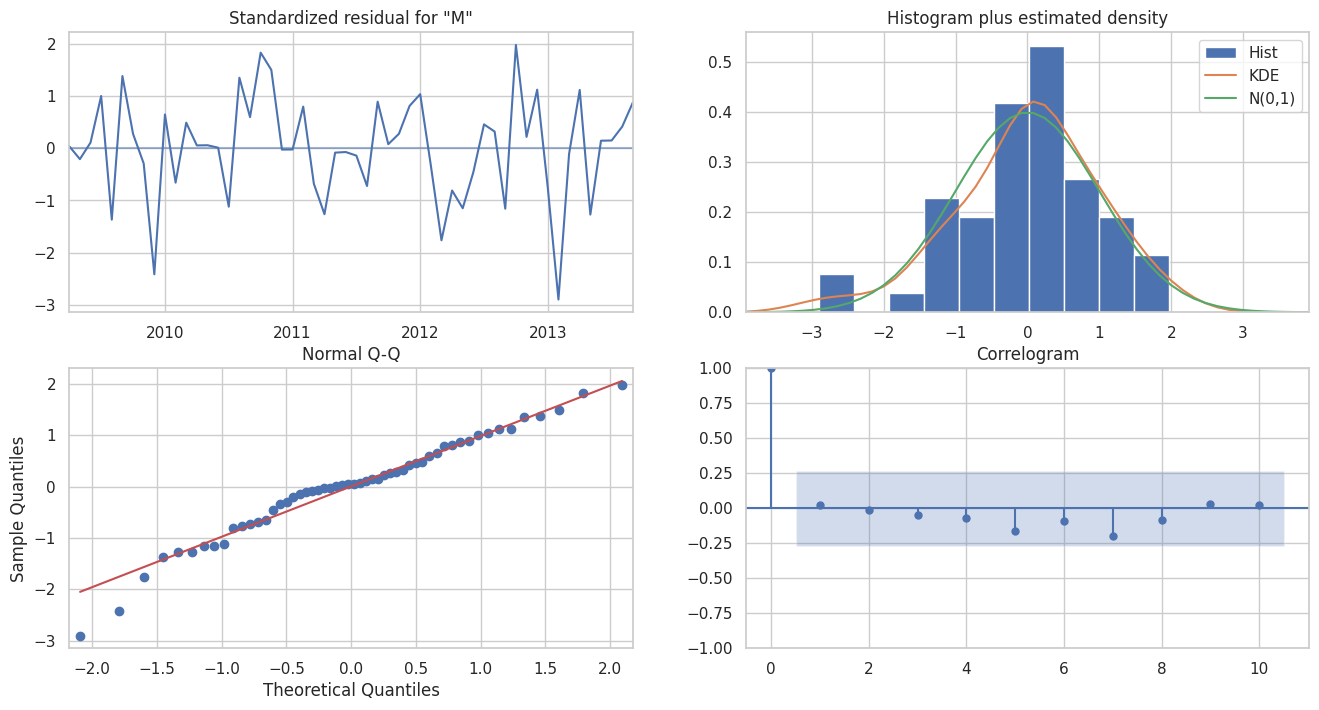

In [69]:
sarima_fitted_final.plot_diagnostics(figsize=(16, 8))
plt.show()

**Observations:**

1. Standardized Residual Plot: The residuals appear to be randomly scattered around zero, with no discernible patterns or trends. This suggests that the model captures the underlying patterns in the data effectively.

2. Histogram Plus Estimated Density: The histogram shows a roughly bell-shaped distribution of the residuals, indicating that they are approximately normally distributed. The kernel density estimate (KDE) further supports this observation.

3. Normal Q-Q Plot: The points on the plot closely follow the diagonal line, confirming the normality assumption.

4. Correlogram (ACF): The ACF plot shows that the autocorrelations at various lags are within the confidence bands, suggesting that the residuals are not autocorrelated. This means that the model has captured the temporal dependencies in the data.

**Inferences:**

1. Model Fit: The model appears to fit the data well, as the residuals are randomly distributed around zero and follow a normal distribution.

2. Residual Independence: The lack of significant autocorrelation in the residuals suggests that the model captures the temporal dependencies in the data effectively.

3. Normality Assumption: The normality of the residuals is a key assumption for many statistical tests and inference procedures. The normal Q-Q plot and histogram support this assumption.

4. Model Validation: The overall analysis of the residuals suggests that the SARIMA model is a reasonable choice for forecasting the monthly sales data.

In [70]:
fcast = sarima_fitted_final.get_forecast(12)
forecast_results = pd.DataFrame({'forecast_mean': fcast.predicted_mean,
                                 'forecast_high_95': fcast.conf_int(alpha= 0.05).iloc[:,1],
                                 'forecast_high_80': fcast.conf_int(alpha= 0.20).iloc[:,1],
                                 'forecast_low_80': fcast.conf_int(alpha= 0.20).iloc[:,0],
                                 'forecast_low_95': fcast.conf_int(alpha= 0.05).iloc[:,0],
                                })
forecast_results.index = pd.date_range(start=forecast_results.index[0] , periods=len(forecast_results), freq='MS')
forecast_results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal_periods']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,forecast_mean,forecast_high_95,forecast_high_80,forecast_low_80,forecast_low_95
2013-10-01,756469.982843,837662.052684,809558.623775,703381.341911,675277.913002
2013-11-01,788700.836873,884287.127317,851201.352765,726200.320980,693114.546428
2013-12-01,688949.274531,797029.456049,759619.106692,618279.442370,580869.093013
2014-01-01,693215.295819,812487.724959,771203.345342,615227.246295,573942.866679
2014-02-01,473498.900735,602999.862388,558175.028182,388822.773289,343997.939083
2014-03-01,412800.089281,551778.813497,503673.392567,321926.785995,273821.365065
2014-04-01,406118.861455,553969.030548,502792.890755,309444.832156,258268.692363
2014-05-01,316455.217259,472673.843603,418601.086641,214309.347877,160236.590915
2014-06-01,357809.156692,521970.193277,465148.288990,250470.024393,193648.120107
2014-07-01,417180.679753,588917.200763,529473.155073,304888.204433,245444.158743


Generates a 12-month ahead forecast using the final SARIMA model and creates a forecast_results DataFrame to store the predicted values and their confidence intervals. It includes the predicted mean sales (forecast_mean) and both 95% and 80% confidence intervals, with the upper and lower bounds for each. The 95% confidence intervals reflect a wider range, while the 80% intervals offer a more narrow range with less certainty. The index of the DataFrame is set to a date range starting from the first forecast date, ensuring the results align with the monthly time periods for the forecast.

**Actual and Forecast Values**

Text(0.5, 1.0, 'Actual and Forecast Values')

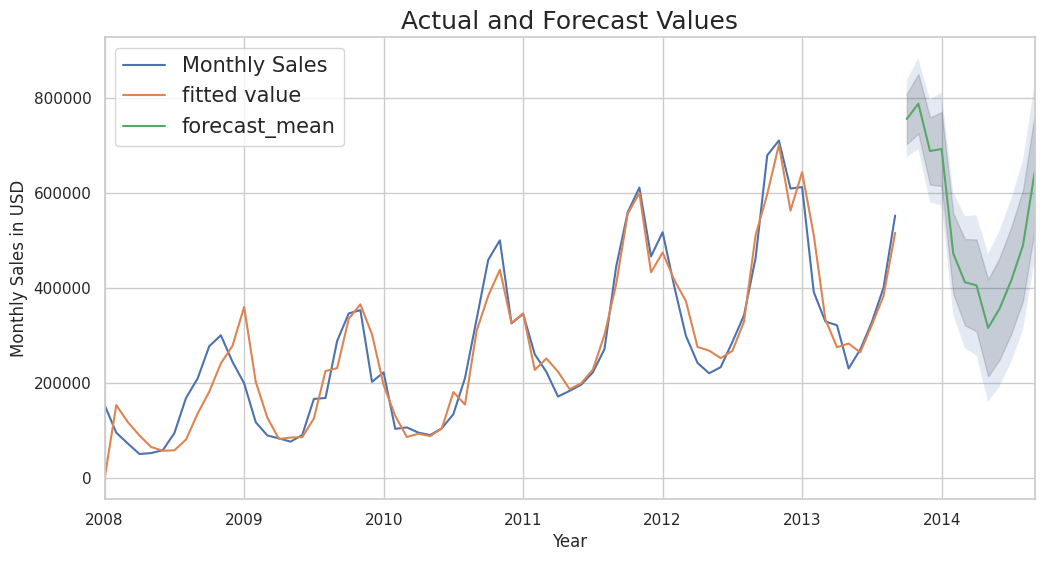

In [74]:
df.plot(figsize=(12,6))
sarima_fitted_final.fittedvalues.plot(label = 'fitted value')
forecast_results.forecast_mean.plot()
upper_series_80 = forecast_results.forecast_high_80
lower_series_80 = forecast_results.forecast_low_80
upper_series_95 = forecast_results.forecast_high_95
lower_series_95 = forecast_results.forecast_low_95

plt.fill_between(upper_series_80.index,lower_series_80,upper_series_80,color='k', alpha=.15)
plt.fill_between(lower_series_95.index,lower_series_95,upper_series_95,color= None, linestyle ='--', alpha=.15)
plt.legend(loc = 'upper left', fontsize =15)
plt.xlabel('Year')
plt.ylabel('Monthly Sales in USD')
plt.title('Actual and Forecast Values', fontsize = 18)

**Observations:**

1. The fitted values from the SARIMA model closely track the actual values, indicating a good fit.

2. The model captures the overall trend and seasonal patterns present in the data.

3. The forecasted values show a continuation of the trend and seasonal patterns observed in the historical data.

4. The shaded area around the forecast line represents the confidence interval, indicating the uncertainty in the forecast.

**Inferences:**

1. The SARIMA model is effective in capturing the underlying patterns in the monthly sales data.

2. The model can be used to make reasonably accurate forecasts for future sales.

3. The confidence interval provides a measure of uncertainty in the forecast. Wider intervals indicate higher uncertainty.

4. The model might not be as accurate during periods of significant economic or market disruptions.

**8. Conclusion**

In conclusion, the SARIMA model successfully captures the seasonal and trend patterns in the time series data, providing a robust framework for forecasting future monthly sales. By fitting the model to the entire dataset and generating predictions for the next 12 periods, the model offers valuable insights into expected future performance along with confidence intervals that quantify the uncertainty in these predictions. The inclusion of both 95% and 80% confidence intervals allows for a comprehensive understanding of potential outcomes, aiding decision-making processes. Overall, this analysis demonstrates the effectiveness of SARIMA in time series forecasting and its utility for businesses seeking to plan and strategize based on predicted trends.